In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa as lr
from IPython.display import Audio

# Generate ADSR-Signal

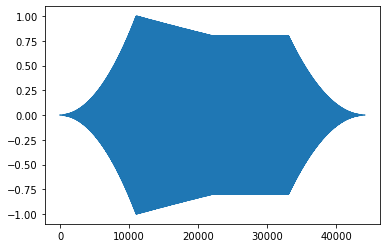

In [2]:
sr = 44100
length = 1
freq = 800
t = np.linspace(0, length, int(length * sr))
x = np.sin(t * 2 * np.pi * freq)

env_part_length = int(sr * length / 4)
decay_val = 0.8
a = np.linspace(0, 1, env_part_length) ** 2
d = np.linspace(1, np.sqrt(decay_val), env_part_length) ** 2
s = np.ones(env_part_length) * np.sqrt(decay_val) ** 2
r = np.linspace(np.sqrt(decay_val), 0, env_part_length) ** 2
env = np.concatenate((a, d, s, r))

x = x * env

plt.plot(x)
plt.show()

display(Audio(x, rate=sr))

# RMS (Root Mean Square)

Bisher haben wir `np.max`, `np.min` und `np.mean(np.abs)` für die Analyse der Amplitude verwendet.

RMS ist definiert als die Wurzel (Root) des quadratischen (Square) Durchschnitts (Mean):

$x_{RMS} = \sqrt{\frac{1}{n}(x_1^2 + x_2^2 + \dots + x_n^2)}$

<br>

<div style="background-color:lightyellow;border-style:groove">
    
**Aufgabe 1**:
    
Berechnet den RMS-Wert unseres Audio-Samples.
    
*Tipps*: 
    
- In dieser Aufgabe geht es nur darum, einen Wert für das gesamte Audio-File zu errechnen (also keine Fensterung).
- Es gibt mehrere Lösungsansätze:
    1. mit `np.sum`
    2. mit `np.mean`
    3. ...

</div>

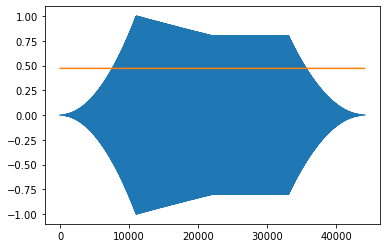

In [3]:
rms = np.sqrt(np.mean(x ** 2))

plt.plot(x)
rms = np.ones(x.size) * rms
plt.plot(rms)
plt.show()

---

RMS kann natürlich auch als eine (diskrete) Folge and Werten definiert werden.

<br>

<div style="background-color:lightyellow;border-style:groove">

**Aufgabe 2**:

Schreibt eine Funktion basierend auf der `calc_amp_env` Funktion, die mithilfe der Fensterungstechnik eine RMS-Envelope berechnet.

</div>

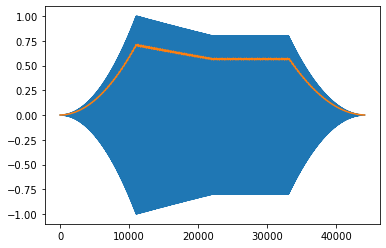

In [4]:
def calc_rms_env(x, hop_size=100, win_len=200):

    num_windows = (len(x) - win_len) // hop_size
    
    rms_env = np.zeros(num_windows)
    
    for i in range(num_windows):
        start_i = i * hop_size
        stop_i = start_i + win_len
        win = x[start_i:stop_i]
        rms_env[i] = np.sqrt(np.mean(win ** 2))
    
    return rms_env

plt.plot(x)
rms_env = calc_rms_env(x)
t_env = np.linspace(0, x.size, rms_env.size)
plt.plot(t_env, rms_env)
plt.show()